# Identifying Fake News on Twitter - Text Model

In [2]:
from fastai.text import * 

In [5]:
from pathlib import Path

rootdir = Path('./')

In [6]:
df = pd.read_csv(rootdir/'tweets.csv')
df.head()

,text,annotation
0,Scene at #DammartinEnGoele as police hunt #Cha...,True
1,"Armed with kalachnikovs &amp; rocketlauncher, ...",True
2,A heartstopping moment as this hostage gets ou...,True
3,Here's that dramatic video via @josh_wingrove ...,True
4,Parliament was stormed by at least one gunman ...,True


# Language model

In [24]:
data_lm = TextLMDataBunch.from_csv(rootdir, 'tweets.csv', text_cols=["text"], label_cols=["annotation"])

In [25]:
data_lm.save('data_lm_export.pkl')

In [26]:
data_lm = load_data(rootdir, 'data_lm_export.pkl')

In [27]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.833951,4.087676,0.314807,00:01


In [28]:
learn.predict("RT", n_words=10)

'RT Minister for Religion and Religion ,'

In [29]:
learn.save_encoder('ft_enc')

# Text Classification Model

In [30]:
data_clas = TextClasDataBunch.from_csv(rootdir, 'tweets.csv', vocab=data_lm.train_ds.vocab, bs=32, text_cols=["text"], label_cols=["annotation"])

In [31]:
data_clas.save('data_clas_export.pkl')

In [68]:
data_clas = load_data(rootdir, 'data_clas_export.pkl', bs=16)

In [69]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (1363 items)
x: TextList
xxbos xxup update : xxmaj no survivors are expected among the 150 people aboard # xxmaj germanwings plane . http : / / t.co / xxunk http : / / t.co / xxunk,xxbos xxup breaking : xxmaj police source has told xxmaj the xxmaj globe that a second shooter has been shot . # ottawashooting,xxbos xxmaj xxunk of xxmaj parliament shootings - an hour later and xxunk + mps and dozens of reporters would have been in hall where shooting took place,xxbos xxmaj xxunk . 11 shot dead in an assault on a xxmaj paris magazine . http : / / t.co / xxunk # charliehebdo http : / / t.co / xxunk,xxbos xxup german xxup news xxup report : xxmaj co - xxmaj pilot of xxmaj germanwings xxmaj airbus xxmaj was xxup muslim xxup convert … ’ xxmaj hero of xxmaj islamic xxmaj state ’ ? http : / / t.co / xxmaj xxunk m via @gatewaypundit
y: CategoryList
True,False,True,True,False
Path: .;

Valid: LabelList (342 items)
x: TextList
xxbos xxmaj breakin

In [70]:
data_clas.show_batch()

text,target
xxbos xxup breaking xxup news : xxup gunman xxup xxunk xxup to xxup speak xxup to xxup australian xxup prime xxup minister xxup and xxup also xxup xxunk xxup for xxup an xxup islamic xxup state xxup flag xxup to xxup be xxup brought xxup to xxup lindt xxup cafe .,True
xxbos xxmaj german xxup pi - xxmaj news xxmaj magazine is xxmaj reporting xxmaj germanwings xxmaj co - xxmaj pilot xxmaj was xxmaj recent xxmaj convert to xxmaj islam xxunk \n \n xxmaj xxunk : http : / / t.co / xxunk http : / / t.co / xxunk,False
xxbos # xxup breaking : xxmaj the xxmaj artist xxmaj formerly xxmaj known xxmaj to xxmaj perform xxmaj will xxmaj not xxmaj be xxmaj doing xxmaj so xxmaj xxunk . xxmaj sorry xxmaj prince xxmaj fans . # xxmaj toronto # xxmaj concert # xxmaj xxunk,False
"xxbos xxup developing : xxmaj gunman xxmaj takes xxmaj hostages xxmaj in xxmaj sydney xxmaj cafe , ' xxup isis ' xxmaj flags xxmaj being xxmaj held xxmaj against xxmaj window - http : / / t.co / gdkig15yun http : / / t.co / xxunk",True
xxbos xxup german xxup news xxup report : xxmaj co - xxmaj pilot of xxmaj germanwings xxmaj airbus xxmaj was xxup muslim xxup convert … ’ xxmaj hero of xxmaj islamic xxmaj state ’ ? http : / / t.co / xxmaj xxunk m via @gatewaypundit,False


In [71]:
learn.fit_one_cycle(1, 1e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.733866,0.664081,0.625731,00:03


In [77]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


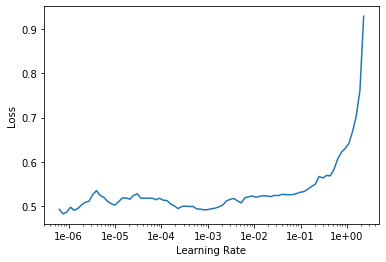

In [78]:
learn.recorder.plot()

In [76]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.564579,0.505043,0.754386,00:03


In [79]:
learn.show_results()

text,target,prediction
xxbos # xxmaj germanwings xxmaj co xxmaj pilot xxmaj new xxmaj muslim xxmaj convert \n \n xxmaj islamic xxmaj state xxmaj xxunk xxmaj their xxmaj hero \n \n # xxunk xxunk xxunk \n http : / / t.co / xxunk http : / / t.co / xxunk,False,True
xxbos xxmaj gendarmerie xxunk at the hostage taking in xxmaj dammartin - en - xxmaj goele . xxmaj latest : http : / / t.co / 7n7uvclhwy ( xxmaj pic : xxmaj xxunk / xxmaj reuters ) http : / / t.co / xxunk,True,True
xxbos xxmaj the xxmaj image xxmaj that xxmaj everyone xxmaj is xxmaj xxunk is n't xxmaj by xxmaj banksy — xxmaj but xxmaj it 's xxmaj xxunk . # charliehebdo http : / / t.co / xxunk http : / / t.co / xxunk,False,True
xxbos # xxmaj germanwings latest : http : / / t.co / xxunk \n - # xxmaj airbus xxup a320 crashes in xxmaj french xxmaj alps \n - xxmaj barcelona - to - xxmaj dusseldorf flight \n - 142 passengers & & 6 crew,False,False
xxbos xxmaj flag in window of xxmaj sydney xxmaj lindt cafe not an xxup isis flag . xxmaj reads : ‘ xxmaj there is no xxmaj god but xxmaj allah and xxmaj muhammad is the messenger of xxmaj god ’ ( @liztilley84 ),True,True


In [83]:
learn.predict("Germanwings A320 aircraft flying from Barcelona to Düsseldorf goes down in southern French Alps with 150 on board")

(Category True, tensor(1), tensor([0.4003, 0.5997]))